In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# !pip install tensorflow

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [5]:
class_names = dataset.class_names

class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

(32, 256, 256, 3)
[7 7 3 7 0 0 1 0 7 6 1 7 0 7 4 5 5 9 4 9 2 9 7 7 7 9 3 2 3 4 2 4]


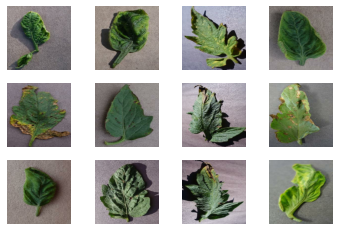

In [6]:
for image_batch, labels_batch  in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for u in range(12):
        ax = plt.subplot(3,4,u+1)
        plt.imshow(image_batch[u].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
train_size = 0.8
len(dataset)*train_size

400.8

In [8]:
train_ds = dataset.take(400)
len(train_ds)

400

In [9]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [10]:
val_size = 0.1
len(dataset)*val_size

50.1

In [11]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [12]:
test_ds = test_ds.skip(50)
len(test_ds)

51

In [13]:
def get_dataset_partition_tf(ds, train_spilt = 0.8, val_spilt = 0.1, test_spilt = 0.1, shuffle =True, shuffle_size= 10000 ):
    assert(train_spilt+test_spilt+val_spilt) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_spilt*ds_size)
    val_size = int(val_spilt*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

400

In [16]:
len(test_ds)

51

In [17]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)


[[[0.6        0.5568628  0.53333336]
  [0.6117647  0.5686275  0.54509807]
  [0.6431373  0.6        0.5764706 ]
  ...
  [0.8039216  0.77254903 0.7607843 ]
  [0.827451   0.79607844 0.78431374]
  [0.83137256 0.8        0.7882353 ]]

 [[0.6392157  0.59607846 0.57254905]
  [0.62352943 0.5803922  0.5568628 ]
  [0.6156863  0.57254905 0.54901963]
  ...
  [0.79607844 0.7647059  0.7529412 ]
  [0.8039216  0.77254903 0.7607843 ]
  [0.7921569  0.7607843  0.7490196 ]]

 [[0.60784316 0.5647059  0.5411765 ]
  [0.5882353  0.54509807 0.52156866]
  [0.5803922  0.5372549  0.5137255 ]
  ...
  [0.7921569  0.7607843  0.7490196 ]
  [0.7882353  0.75686276 0.74509805]
  [0.76862746 0.7372549  0.7254902 ]]

 ...

 [[0.19215687 0.1764706  0.18039216]
  [0.16078432 0.14509805 0.14117648]
  [0.14117648 0.1254902  0.11372549]
  ...
  [0.8156863  0.78431374 0.77254903]
  [0.8039216  0.77254903 0.7607843 ]
  [0.8        0.76862746 0.75686276]]

 [[0.15686275 0.15294118 0.14509805]
  [0.14509805 0.14117648 0.13333334]


In [19]:
resizeandrescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape = (BATCH_SIZE ,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
input_shape

(32, 256, 256, 3)

In [26]:
input_shape = (BATCH_SIZE ,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10

'''codebasics'''
model = models.Sequential([
    resizeandrescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
# model = models.Sequential()
# model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= input_shape))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(n_classes, activation='softmax'))

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

let's see why none is showing.....^

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [ ]:
history= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
